In [28]:
import pyspark
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import SparkSession

import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import statistics as stat
import pandas as pd

In [2]:
spark = SparkSession.builder.appName("appSpark").getOrCreate()

23/07/10 22:25:07 WARN Utils: Your hostname, debian resolves to a loopback address: 127.0.1.1; using 192.168.0.143 instead (on interface eno1)
23/07/10 22:25:07 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/07/10 22:25:12 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [5]:
file = "./csv/afluenciastc_desglosado_05_2023.csv"


In [3]:
def read_csv(path):
    return spark.read.format("csv")\
            .option("inferSchema", True)\
            .option("header", True)\
            .option("sep", ",")\
            .load(path)

In [6]:
df = read_csv(file)
df.show(10, False)

+----------+-----+----+-------+----------------------+---------+---------+
|fecha     |mes  |anio|linea  |estacion              |tipo_pago|afluencia|
+----------+-----+----+-------+----------------------+---------+---------+
|2021-01-01|Enero|2021|Linea 1|Balbuena              |Boleto   |1848     |
|2021-01-01|Enero|2021|Linea 1|Balbuena              |Prepago  |790      |
|2021-01-01|Enero|2021|Linea 1|Balbuena              |Gratuidad|325      |
|2021-01-01|Enero|2021|Linea 1|Balderas              |Boleto   |1103     |
|2021-01-01|Enero|2021|Linea 1|Balderas              |Prepago  |922      |
|2021-01-01|Enero|2021|Linea 1|Balderas              |Gratuidad|651      |
|2021-01-01|Enero|2021|Linea 1|Boulevard Puerto Aéreo|Boleto   |4890     |
|2021-01-01|Enero|2021|Linea 1|Boulevard Puerto Aéreo|Prepago  |2797     |
|2021-01-01|Enero|2021|Linea 1|Boulevard Puerto Aéreo|Gratuidad|1053     |
|2021-01-01|Enero|2021|Linea 1|Candelaria            |Boleto   |0        |
+----------+-----+----+--

In [18]:
df.filter((df['anio'] == 2023) & (df['afluencia'] != 0)).show()

+----------+-----+----+-------+-----------+---------+---------+
|     fecha|  mes|anio|  linea|   estacion|tipo_pago|afluencia|
+----------+-----+----+-------+-----------+---------+---------+
|2023-01-01|Enero|2023|Linea 1|   Balderas|   Boleto|     2823|
|2023-01-01|Enero|2023|Linea 1|   Balderas|  Prepago|     2234|
|2023-01-01|Enero|2023|Linea 1|   Balderas|Gratuidad|     2325|
|2023-01-01|Enero|2023|Linea 1| Cuauhtémoc|   Boleto|     1320|
|2023-01-01|Enero|2023|Linea 1| Cuauhtémoc|  Prepago|      752|
|2023-01-01|Enero|2023|Linea 1| Cuauhtémoc|Gratuidad|      320|
|2023-01-01|Enero|2023|Linea 1|Insurgentes|   Boleto|     2853|
|2023-01-01|Enero|2023|Linea 1|Insurgentes|  Prepago|     4338|
|2023-01-01|Enero|2023|Linea 1|Insurgentes|Gratuidad|     3154|
|2023-01-01|Enero|2023|Linea 1|    Sevilla|   Boleto|     1803|
|2023-01-01|Enero|2023|Linea 1|    Sevilla|  Prepago|     1660|
|2023-01-01|Enero|2023|Linea 1|    Sevilla|Gratuidad|      533|
|2023-01-01|Enero|2023|Linea 1|Chapultep

In [21]:
df.filter((df['fecha'] == '2023-01-01') & (df['afluencia'] != 0)).groupBy('linea').count().show()

+-------+-----+
|  linea|count|
+-------+-----+
|Linea 6|   33|
|Linea 8|   57|
|Linea 1|   24|
|Linea 9|   35|
|Linea B|   62|
|Linea 2|   72|
|Linea A|   30|
|Linea 3|   63|
|Linea 7|   40|
|Linea 5|   39|
|Linea 4|   30|
+-------+-----+



In [42]:
df.filter((df['anio'] == '2023') & (df['afluencia'] != 0)).groupBy('linea')\
        .agg({'afluencia': 'sum'}).orderBy('sum(afluencia)').show()

+--------+--------------+
|   linea|sum(afluencia)|
+--------+--------------+
| Linea 4|      11000357|
|Linea 12|      12695244|
| Linea 6|      16624550|
| Linea 5|      25039890|
| Linea 1|      25076163|
| Linea 7|      31334251|
| Linea A|      32218774|
| Linea 9|      40707579|
| Linea B|      53281235|
| Linea 8|      54450756|
| Linea 3|      73602335|
| Linea 2|      80455442|
+--------+--------------+



In [66]:
df.filter((df['anio'] == '2023') & (df['afluencia'] != 0)).groupBy('linea')\
        .agg({'afluencia': 'sum'}).orderBy('sum(afluencia)').describe().show()

+-------+-------+--------------------+
|summary|  linea|      sum(afluencia)|
+-------+-------+--------------------+
|  count|     12|                  12|
|   mean|   null|         3.8040548E7|
| stddev|   null|2.3002987241147168E7|
|    min|Linea 1|            11000357|
|    max|Linea B|            80455442|
+-------+-------+--------------------+



In [70]:
df.filter((df['anio'] == '2023') & (df['afluencia'] != 0)).groupBy('estacion')\
        .agg({'afluencia': 'sum'}).orderBy('sum(afluencia)').describe('sum(afluencia)').show()

+-------+------------------+-------------------+
|summary|    sum(afluencia)|           estacion|
+-------+------------------+-------------------+
|  count|               145|                145|
|   mean|3148183.2827586206|               null|
| stddev|2730413.5865286225|               null|
|    min|            500485|           Acatitla|
|    max|          20458762|Zócalo/Tenochtitlan|
+-------+------------------+-------------------+



In [72]:
estaciones_afluencia_df = df.filter((df['anio'] == '2023') & (df['afluencia'] != 0)).groupBy('estacion')\
        .agg({'afluencia': 'sum'})

In [73]:
estaciones_afluencia_df.orderBy(col('sum(afluencia)').desc()).show()

+--------------------+--------------+
|            estacion|sum(afluencia)|
+--------------------+--------------+
|           Pantitlán|      20458762|
|Constitución de 1917|      15713270|
|       Indios Verdes|      13343322|
|            Tacubaya|      11026423|
|            Tasqueña|       8209932|
|         Universidad|       8064861|
|      Cuatro Caminos|       8041816|
|            Balderas|       7878021|
|          Buenavista|       7678568|
| Zócalo/Tenochtitlan|       7122799|
|      Martín Carrera|       6477071|
|              Puebla|       5980504|
|             Hidalgo|       5859048|
|              La Paz|       5855167|
|          El Rosario|       5693447|
|           Atlalilco|       5660526|
|        Observatorio|       5590072|
|        Bellas Artes|       5484726|
|        Chilpancingo|       5427749|
|       Ciudad Azteca|       5328345|
+--------------------+--------------+
only showing top 20 rows



In [78]:
estaciones_afluencia_df.orderBy(col('sum(afluencia)').desc())\
    .write.format('csv').option('header', 'true').save('./csv/estaciones_afluencia_v1.csv')

In [81]:
estaciones_afluencia_df.orderBy(col('sum(afluencia)').desc())\
    .write.format('parquet').option('header', 'true').save('./parquet/estaciones_afluencia_v1.parquet')

AnalysisException: [PATH_ALREADY_EXISTS] Path file:/home/rigomortiz/Documentos/Notebooks/parquet/estaciones_afluencia_v1.parquet already exists. Set mode as "overwrite" to overwrite the existing path.

In [82]:
df.show(10, False)

+----------+-----+----+-------+----------------------+---------+---------+
|fecha     |mes  |anio|linea  |estacion              |tipo_pago|afluencia|
+----------+-----+----+-------+----------------------+---------+---------+
|2021-01-01|Enero|2021|Linea 1|Balbuena              |Boleto   |1848     |
|2021-01-01|Enero|2021|Linea 1|Balbuena              |Prepago  |790      |
|2021-01-01|Enero|2021|Linea 1|Balbuena              |Gratuidad|325      |
|2021-01-01|Enero|2021|Linea 1|Balderas              |Boleto   |1103     |
|2021-01-01|Enero|2021|Linea 1|Balderas              |Prepago  |922      |
|2021-01-01|Enero|2021|Linea 1|Balderas              |Gratuidad|651      |
|2021-01-01|Enero|2021|Linea 1|Boulevard Puerto Aéreo|Boleto   |4890     |
|2021-01-01|Enero|2021|Linea 1|Boulevard Puerto Aéreo|Prepago  |2797     |
|2021-01-01|Enero|2021|Linea 1|Boulevard Puerto Aéreo|Gratuidad|1053     |
|2021-01-01|Enero|2021|Linea 1|Candelaria            |Boleto   |0        |
+----------+-----+----+--

In [56]:
afleuncia_by_dia_df = df.select('fecha', 'linea', 'estacion', 'afluencia')\
            .groupBy('fecha')\
            .agg(sum('afluencia').alias('afluencia'))

In [57]:
afleuncia_by_dia_df.orderBy('fecha').show()

+----------+---------+
|     fecha|afluencia|
+----------+---------+
|2021-01-01|   723937|
|2021-01-02|  1365016|
|2021-01-03|  1175547|
|2021-01-04|  2174685|
|2021-01-05|  2232672|
|2021-01-06|  1957117|
|2021-01-07|  1967338|
|2021-01-08|  2044443|
|2021-01-09|   940652|
|2021-01-10|   524758|
|2021-01-11|  1055126|
|2021-01-12|  1224639|
|2021-01-13|  1242422|
|2021-01-14|  1272387|
|2021-01-15|  1316278|
|2021-01-16|  1159839|
|2021-01-17|   632192|
|2021-01-18|  1264719|
|2021-01-19|  1292800|
|2021-01-20|  1299588|
+----------+---------+
only showing top 20 rows



In [58]:
afleuncia_by_dia_df.describe().show()

+-------+------------------+
|summary|         afluencia|
+-------+------------------+
|  count|               881|
|   mean|2588983.4506242904|
| stddev| 686148.6466311815|
|    min|            524758|
|    max|           3729680|
+-------+------------------+



In [65]:
df.select(col('fecha').substr(1, 7).alias('fecha'), 'afluencia')\
        .groupBy('fecha')\
        .agg(sum('afluencia').alias('afluencia'))\
        .orderBy('fecha')\
        .show(20, False)

+-------+---------+
|fecha  |afluencia|
+-------+---------+
|2021-01|41033642 |
|2021-02|50436321 |
|2021-03|65449779 |
|2021-04|62577359 |
|2021-05|62689975 |
|2021-06|63410819 |
|2021-07|69822069 |
|2021-08|67964499 |
|2021-09|70154247 |
|2021-10|78122952 |
|2021-11|78483883 |
|2021-12|84154004 |
|2022-01|70563670 |
|2022-02|72052555 |
|2022-03|88358374 |
|2022-04|82897274 |
|2022-05|91245641 |
|2022-06|88424030 |
|2022-07|80680662 |
|2022-08|90184617 |
+-------+---------+
only showing top 20 rows



In [67]:
df.describe().show()

23/07/10 23:44:17 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+----------+------------------+-------+-------------------+---------+-----------------+
|summary|       mes|              anio|  linea|           estacion|tipo_pago|        afluencia|
+-------+----------+------------------+-------+-------------------+---------+-----------------+
|  count|    515385|            515385| 515385|             515385|   515385|           515385|
|   mean|      null|2021.7570942111238|   null|               null|     null|4425.612736109899|
| stddev|      null|0.7257381552942287|   null|               null|     null|6473.921058332933|
|    min|     Abril|              2021|Linea 1|           Acatitla|   Boleto|                0|
|    max|Septiembre|              2023|Linea B|Zócalo/Tenochtitlan|  Prepago|           101618|
+-------+----------+------------------+-------+-------------------+---------+-----------------+



23/07/10 23:50:42 WARN JavaUtils: Attempt to delete using native Unix OS command failed for path = /tmp/blockmgr-b4c48700-2173-46f7-b24a-72b52ff75028. Falling back to Java IO way
java.io.IOException: Failed to delete: /tmp/blockmgr-b4c48700-2173-46f7-b24a-72b52ff75028
	at org.apache.spark.network.util.JavaUtils.deleteRecursivelyUsingUnixNative(JavaUtils.java:177)
	at org.apache.spark.network.util.JavaUtils.deleteRecursively(JavaUtils.java:113)
	at org.apache.spark.network.util.JavaUtils.deleteRecursively(JavaUtils.java:94)
	at org.apache.spark.util.Utils$.deleteRecursively(Utils.scala:1231)
	at org.apache.spark.storage.DiskBlockManager.$anonfun$doStop$1(DiskBlockManager.scala:368)
	at org.apache.spark.storage.DiskBlockManager.$anonfun$doStop$1$adapted(DiskBlockManager.scala:364)
	at scala.collection.IndexedSeqOptimized.foreach(IndexedSeqOptimized.scala:36)
	at scala.collection.IndexedSeqOptimized.foreach$(IndexedSeqOptimized.scala:33)
	at scala.collection.mutable.ArrayOps$ofRef.foreach

In [122]:
!pip install matplotlib --break-system-packages
!pip install pandas --break-system-packages
!pip install numpy --break-system-packages
!pip install scikit-learn --break-system-packages

Defaulting to user installation because normal site-packages is not writeable


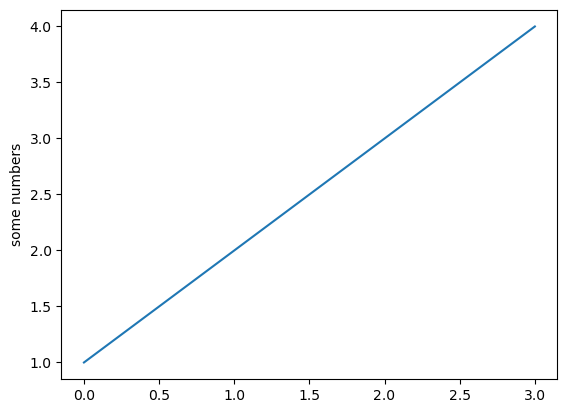

In [128]:
plt.plot([1, 2, 3, 4])
plt.ylabel('some numbers')
plt.show()

In [129]:
afluencia_by_fecha

DataFrame[fecha: date, sum(sum(sum(afluencia))): bigint]

In [36]:
df2 = lineas_df.toPandas()
df2.sort_values(by=['fecha'], inplace=True).rename(columns={'sum(afluencia)': 'afluencia'}, inplace=True)
df2['dia'] = pd.to_datetime(df2['fecha']).map(lambda dt: dt.replace(day=1))
afluencia_by_dia = df2.groupby('dia').sum('afluencia')
afluencia_by_dia

,afluencia
dia,
2021-01-01,41033642
2021-02-01,50436321
2021-03-01,65449779
2021-04-01,62577359
2021-05-01,62689975
2021-06-01,63410819
2021-07-01,69822069
2021-08-01,67964499
2021-09-01,70154247


In [48]:
df2.groupby('dia').sum('afluencia').columns

Index(['afluencia'], dtype='object')

KeyError: 'dia'

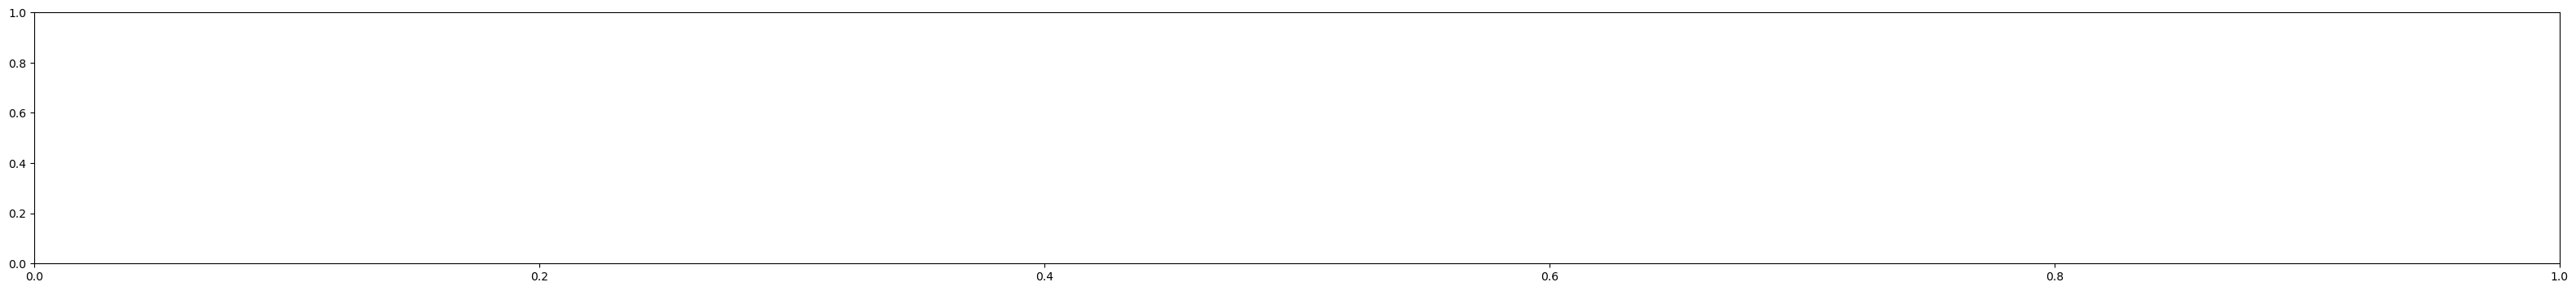

In [37]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [40, 4]
d1 = afluencia_by_dia['dia'][0:200]
d2 = afluencia_by_dia['afluencia'][0:200]
ax.plot(d1, d2, 'ro')
plt.axhline(np.mean(d2))
plt.axhline(np.max(d2))
plt.axhline(np.min(d2))
#plt.axhline(np.median(d2))
#plt.axhline(stat.mode(d2))

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.xticks(rotation=45)
plt.show()

In [38]:
np.mean(d2)
np.max(d2)
np.min(d2)
np.median(d2)
stat.mode(d2)

0

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (29, 2) + inhomogeneous part.

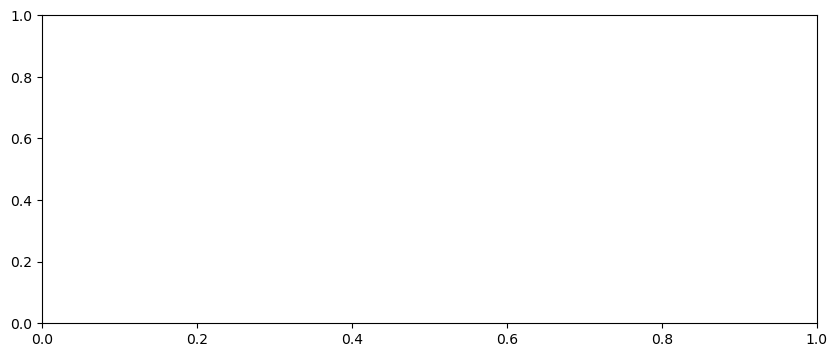

In [252]:
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [10, 4]
d1 = df3['YearMonth']
d2 = df3['sum(sum(sum(afluencia)))']
ax.plot(d1, d2, 'ro')
plt.axhline(np.mean(d3))
plt.axhline(np.max(d3))
plt.axhline(np.min(d3))
#plt.axhline(np.median(d2))
#plt.axhline(stat.mode(d2))

ax.format_xdata = mdates.DateFormatter('%Y-%m-%d')
plt.xticks(rotation=45)
plt.show()